In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Loading the csv file

In [2]:
file = 'creditcard.csv'
df = pd.read_csv(file)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
X = df.drop('Class', axis=1)  
y = df['Class']

# Target Class Distribution

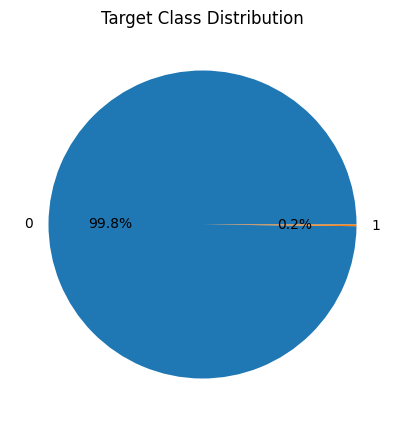

In [7]:
s = y.value_counts()
plt.figure(figsize=(5,5))
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.title('Target Class Distribution')
plt.show()

<h2> This dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier.

# Standardization

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction using PCA

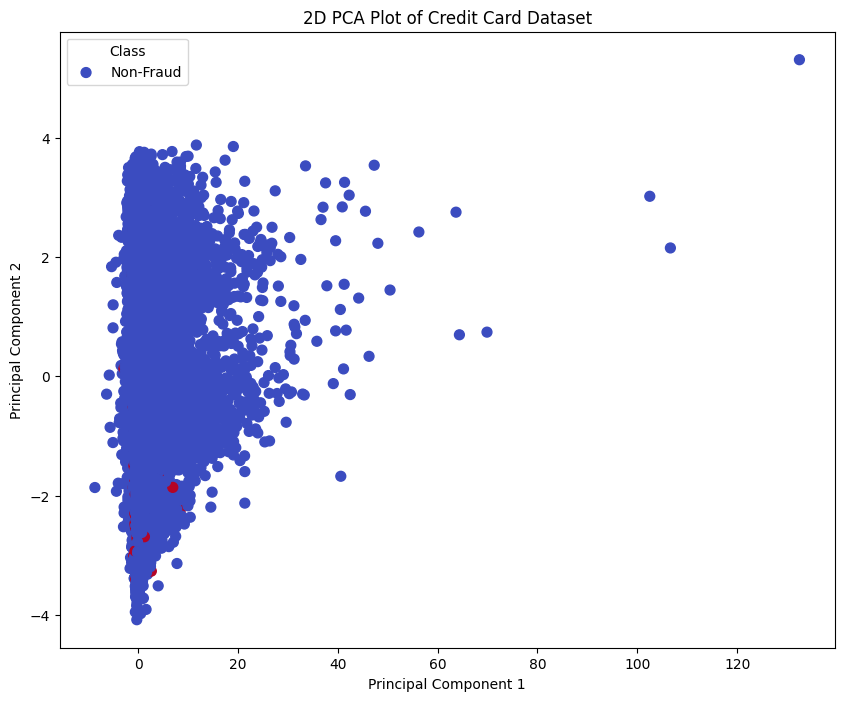

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 8))
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y, cmap='coolwarm', s=50)
plt.title('2D PCA Plot of Credit Card Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
plt.show()


# SVM ML models

In [10]:
kernels = {
    'linear': SVC(kernel='linear', random_state=42),
    'rbf': SVC(kernel='rbf', gamma=2, random_state=42),
    'poly': SVC(kernel='poly', degree=3, gamma=2, random_state=42)
}

# plotting training data decision boundary

In [11]:
def plot_training_data_with_decision_boundary(kernel, X, y):
    clf = SVC(kernel=kernel, gamma=2).fit(X, y)
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(**common_params, response_method="predict", plot_method="pcolormesh", alpha=0.3)
    DecisionBoundaryDisplay.from_estimator(**common_params, response_method="decision_function", plot_method="contour", levels=[-1, 0, 1], colors="k", linestyles=["--", "-", "--"])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors="none", edgecolors="k")
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")

    unique_labels = np.unique(y)
    legend_labels = ['Non-Fraud' if label == 0 else 'Fraud' for label in unique_labels]
    ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc="upper right", title="Classes")
    ax.set_title(f"Decision boundaries of {kernel} kernel in SVC")
    plt.show()

# Model Building and evaluation metrics


linear Kernel SVM Results:
Accuracy: 0.9983
Confusion Matrix:
[[56864     0]
 [   98     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



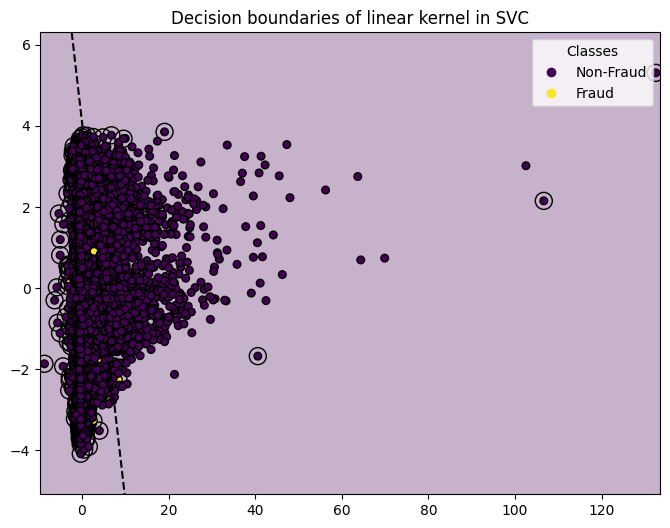


rbf Kernel SVM Results:
Accuracy: 0.9983
Confusion Matrix:
[[56864     0]
 [   98     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



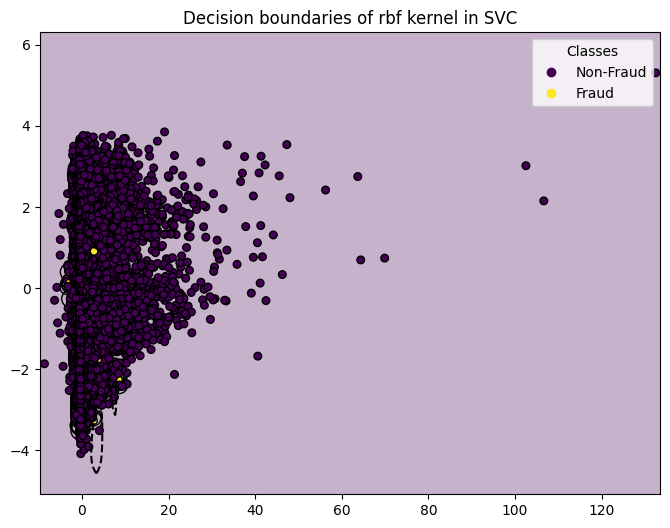

In [ ]:
for name, svm_model in kernels.items():
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f'\n{name} Kernel SVM Results:')
    print(f'Accuracy: {acc:.4f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred, zero_division=0))

    plot_training_data_with_decision_boundary(name, X_train, y_train)
